# 乳癌資料庫預測SVM分類
>使用scikit-learn 機器學習套件裡的SVR演算法

* (一)引入函式庫及內建乳癌資料集<br>
引入之函式庫如下<br>
sklearn.datasets: 用來匯入內建之乳癌資料集`datasets.load_breast_cancer()`<br>
sklearn.SVR: 支持向量機回歸分析之演算法<br>
matplotlib.pyplot: 用來繪製影像

from sklearn import svm
這個函式庫匯入了 svm 模組，svm 是支持向量機（Support Vector Machines）的縮寫。svm 包含了支持向量分類器（SVC）、支持向量回歸（SVR）等機器學習演算法。

import pandas as pd
pandas 是一個強大的資料處理和分析工具。它提供了 DataFrame 資料結構，類似於 Excel 表格，可以方便地處理結構化數據。

import numpy as np
numpy 是一個數值計算的函式庫，提供了多維陣列物件和各種運算工具。numpy 是很多科學計算和機器學習函式庫的基礎。

import matplotlib.pyplot as plt
matplotlib.pyplot 是一個繪圖函式庫，提供了一系列繪製靜態、動態和互動式影像的工具。pyplot 模組讓我們可以像 MATLAB 一樣使用簡單的指令繪製圖表。

from sklearn import datasets
datasets 模組提供了一些內建的數據集，方便用來做練習和測試。這些數據集包括乳癌數據集、手寫數字數據集、鳶尾花數據集等。

from sklearn.model_selection import train_test_split
train_test_split 函數用於將數據集分為訓練集和測試集。這是一個很重要的步驟，可以幫助我們評估模型的性能，避免過擬合（overfitting）。

from sklearn.metrics import accuracy_score
accuracy_score 函數用於計算模型預測的準確率。準確率是機器學習中最常用的評估指標之一，表示模型預測正確的比例。

In [4]:
from sklearn import svm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Step1. 下載資料

In [6]:
# 匯入內建的乳癌資料集
breast_cancer = datasets.load_breast_cancer()

# 提取特徵數據
feature = breast_cancer.data

# 提取目標數據（分類標籤）
target = breast_cancer.target

# 列印資料集的鍵值
print(breast_cancer.keys())
# keys() 方法會顯示資料集中包含的不同部分，例如 'data', 'target', 'target_names', 'feature_names', 'DESCR' 等

# 列印特徵名稱
print(breast_cancer.feature_names)
# feature_names 包含每個特徵的名稱，例如 'mean radius', 'mean texture', 'mean perimeter' 等

# 列印目標名稱（分類標籤的名稱）
print(breast_cancer.target_names)
# target_names 包含分類標籤的名稱，表示 0 和 1 分別代表的意義，例如 'malignant'（惡性）和 'benign'（良性）

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [9]:
feature

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [11]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [13]:
target_names=breast_cancer.target_names
labels=target_names[target]

In [15]:
labels

array(['malignant', 'malignant', 'malignant', 'malignant', 'malignant',
       'malignant', 'malignant', 'malignant', 'malignant', 'malignant',
       'malignant', 'malignant', 'malignant', 'malignant', 'malignant',
       'malignant', 'malignant', 'malignant', 'malignant', 'benign',
       'benign', 'benign', 'malignant', 'malignant', 'malignant',
       'malignant', 'malignant', 'malignant', 'malignant', 'malignant',
       'malignant', 'malignant', 'malignant', 'malignant', 'malignant',
       'malignant', 'malignant', 'benign', 'malignant', 'malignant',
       'malignant', 'malignant', 'malignant', 'malignant', 'malignant',
       'malignant', 'benign', 'malignant', 'benign', 'benign', 'benign',
       'benign', 'benign', 'malignant', 'malignant', 'benign',
       'malignant', 'malignant', 'benign', 'benign', 'benign', 'benign',
       'malignant', 'benign', 'malignant', 'malignant', 'benign',
       'benign', 'benign', 'benign', 'malignant', 'benign', 'malignant',
       'malignan

## Step2. 區分訓練集與測試集

In [20]:
# 將資料集分為訓練集（80%）和測試集（20%），設定random_state=42以保證每次分割都相同
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)

## Step3. 建模

In [22]:
# 初始化支持向量機分類器
clf = svm.SVC(kernel='linear')

# 訓練模型
clf.fit(X_train, y_train)

SVC(kernel='linear')

## Step4. 預測

```

```


In [25]:
# 使用模型進行預測
y_pred = clf.predict(X_test)

## Step5. 準確度分析

In [27]:
# 計算準確率
accuracy = accuracy_score(y_test, y_pred)
print(f"模型的準確率: {accuracy:.2f}")


模型的準確率: 0.96


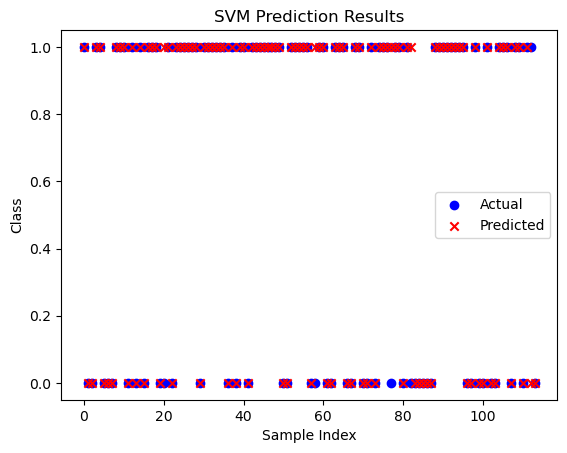

In [31]:
# 繪製部分測試數據的真實值和預測值（僅作為示例）
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_test)), y_pred, color='red', marker='x', label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('SVM Prediction Results')
plt.legend()
plt.show()